In [5]:
import numpy as np
import pandas as pd
from scipy import stats as sts
import matplotlib.pyplot as plt
import math
import seaborn as sbn
from sklearn import metrics as mts
import pandas as pd
from sklearn import cross_validation as cv
from sklearn.linear_model import LinearRegression as lr
import math
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
#выкачаем и предобработаем данные
forest_fires = pd.read_csv('forestfires.csv')
forest_fires['month'] = list(map(lambda month: (int)(month in ['aug', 'jun', 'jul']), forest_fires['month'] ))
forest_fires = forest_fires.drop('day', axis=1)

In [28]:
#перемешаем их
forest_fires = forest_fires.sample(frac=1)
forest_fires.head()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
354,7,4,0,92.1,99.0,745.3,9.6,18.7,50,2.2,0.0,5.97
396,4,3,0,90.5,96.7,750.5,11.4,20.4,55,4.9,0.0,3.64
99,3,4,1,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00
257,4,3,1,94.2,117.2,581.1,11.0,21.4,44,2.7,0.0,0.68
365,6,5,0,91.9,111.7,770.3,6.5,19.6,45,3.1,0.0,20.03


Mean squared error: 570.25


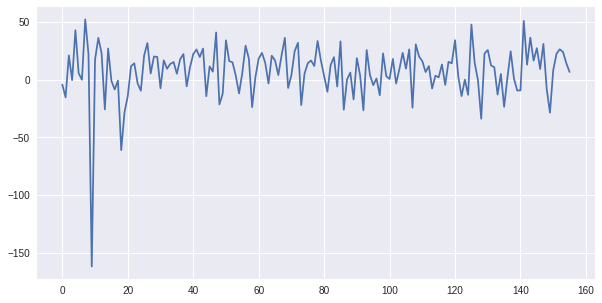

In [29]:
#признаки -- все столбцы, кроме последнего, метка -- последний столбец
X = np.array(forest_fires.values[:, :-1])
y = np.array(forest_fires.values[:, -1])
#разделим данные на части 7:3
train_data, test_data, train_labels, test_labels = cv.train_test_split(X, y, test_size = 0.3)
#обучим и используем линейный регрессор 
regr = lr()
regr.fit(train_data, train_labels)
ans_labels = regr.predict(test_data)
diff = ans_labels - test_labels
#посмотрим на результат
plt.figure(figsize=(10, 5))
plt.plot(list(range(len(diff))), diff)
print("Mean squared error: %.2f"
      % np.mean((regr.predict(test_data) - test_labels) ** 2))

Видим, что в обычном пространстве признаков задача плохо приближается линейной моделью в случае без нормировки данных.

Попробуем преобразовать метку по формуле $f(x) = ln(c + x)$. Посмотрим на результат при различных с.

In [33]:
#характерный масштаб параметра 
np.mean(y)

12.847292069632493

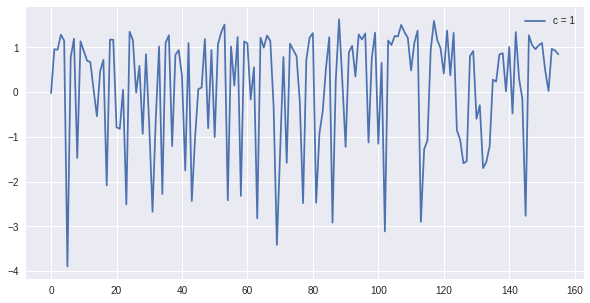

Mean squared error: 1.69


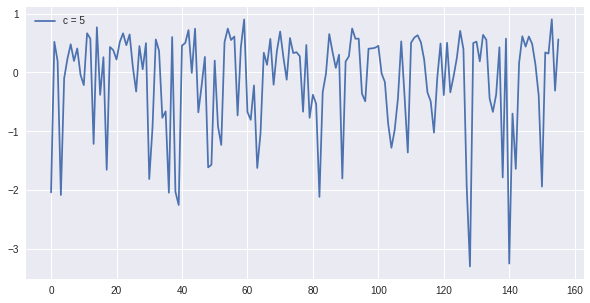

Mean squared error: 0.76


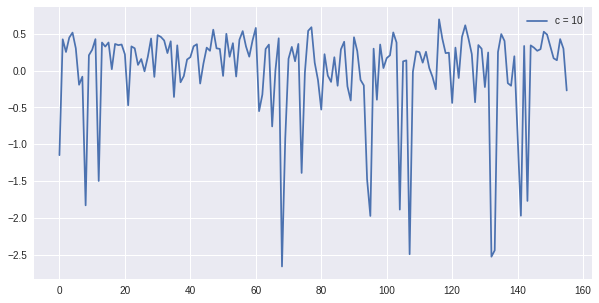

Mean squared error: 0.44


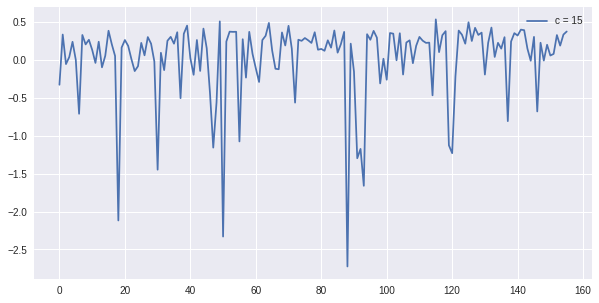

Mean squared error: 0.28


In [30]:
C = [1, 5, 10, 15]
for c in C:
    y_new = np.array(list(map(lambda x: math.log(c + x), y)))
    train_data, test_data, train_labels, test_labels = cv.train_test_split(X, y_new, test_size = 0.3)
    regr = lr()
    regr.fit(train_data, train_labels)
    ans_labels = regr.predict(test_data)
    diff = ans_labels - test_labels
    plt.figure(figsize=(10, 5))
    plt.subplot()
    plt.plot(list(range(len(diff))), diff, label='c = %d' %(c))
    plt.legend()
    plt.show()
    print("Mean squared error: %.2f"  % np.mean((regr.predict(test_data) - test_labels) ** 2))

Видим, что в новом пространстве признаков линейная модель работает гораздо лучше.